In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import datetime
%matplotlib inline

In [3]:
import utils
# utils.check_constant_state_code()

In [5]:
state_keys = pd.read_csv('keys/_/cases_state_key.csv')

mv = pd.read_csv('generated/mv_case_stats_by_year_state.csv')
ni= pd.read_csv('generated/ni_case_stats_by_year_state.csv')
ipc= pd.read_csv('generated/ipc_case_stats_by_year_state.csv')
sorted_mv = mv.sort_values(by='median_decision_days', ascending=True)
sorted_ni = ni.sort_values(by='median_decision_days', ascending=True)
sorted_ipc = ipc.sort_values(by='median_decision_days', ascending=True)

years = [f'20{i}' for i in range(14,16)]
sorted_mv = sorted_mv[sorted_mv['num_cases'] >= 100]
sorted_ni = sorted_ni[sorted_ni['num_cases'] >= 100]
sorted_ipc = sorted_ipc[sorted_ipc['num_cases'] >= 100]

sorted_mv = sorted_mv.merge(state_keys, how = 'inner', on = ['state_code', 'year'])
sorted_ni = sorted_ni.merge(state_keys, how = 'inner', on = ['state_code', 'year'])
sorted_ipc = sorted_ipc.merge(state_keys, how = 'inner', on = ['state_code', 'year'])
sorted_dfs = [sorted_mv, sorted_ni, sorted_ipc]

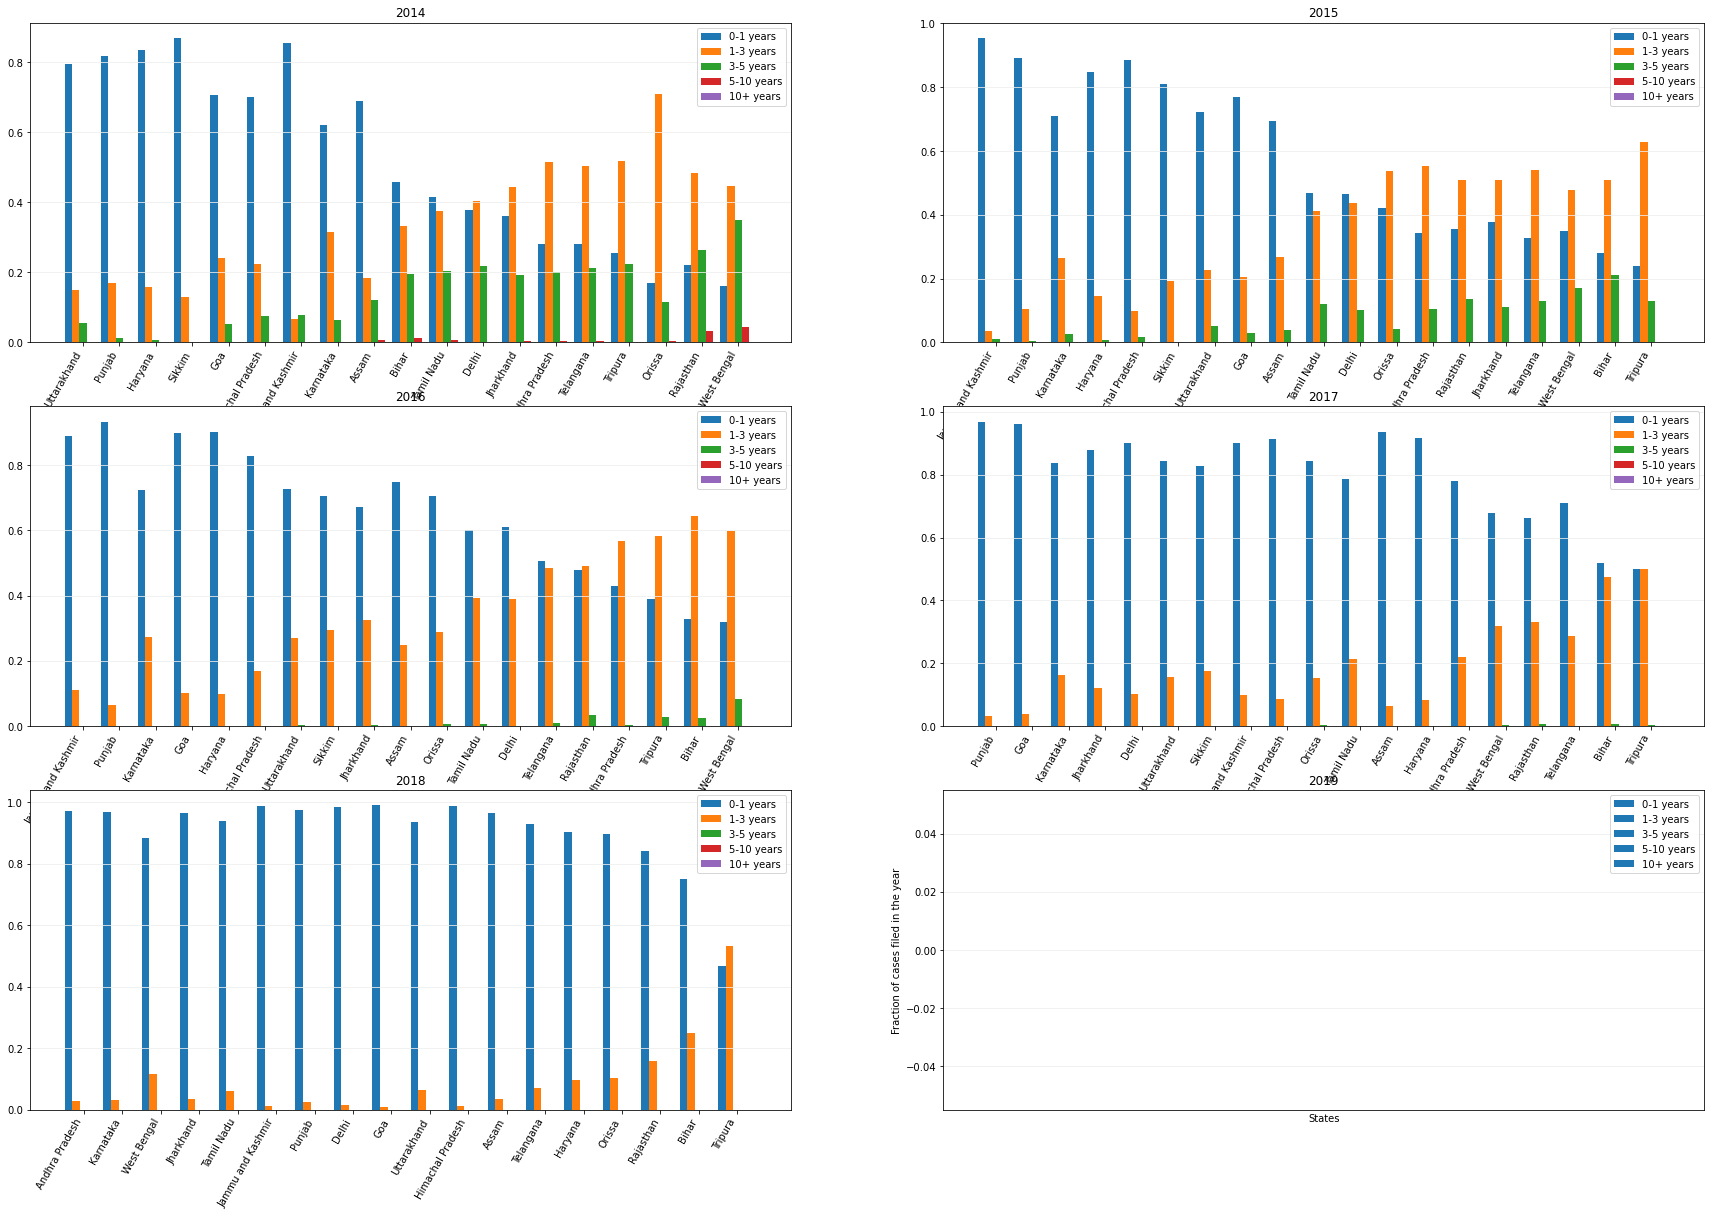

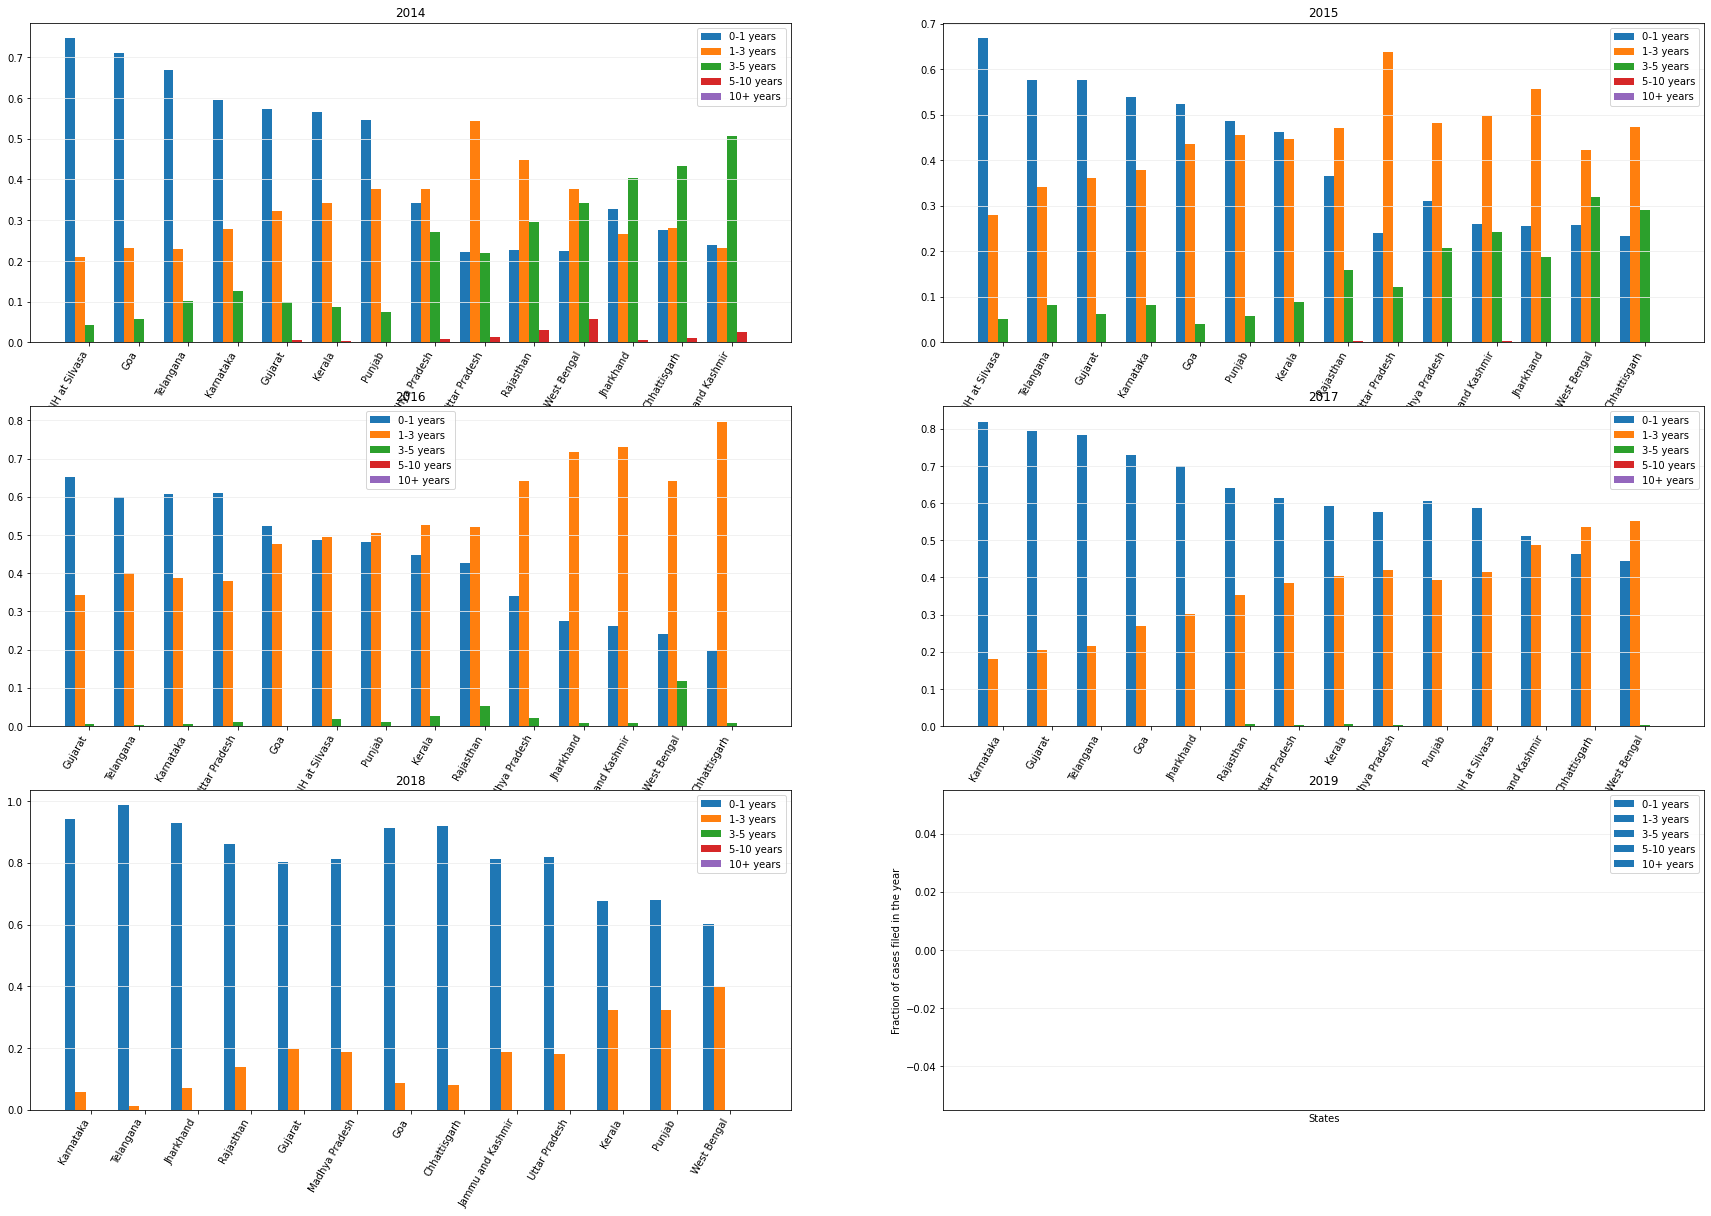

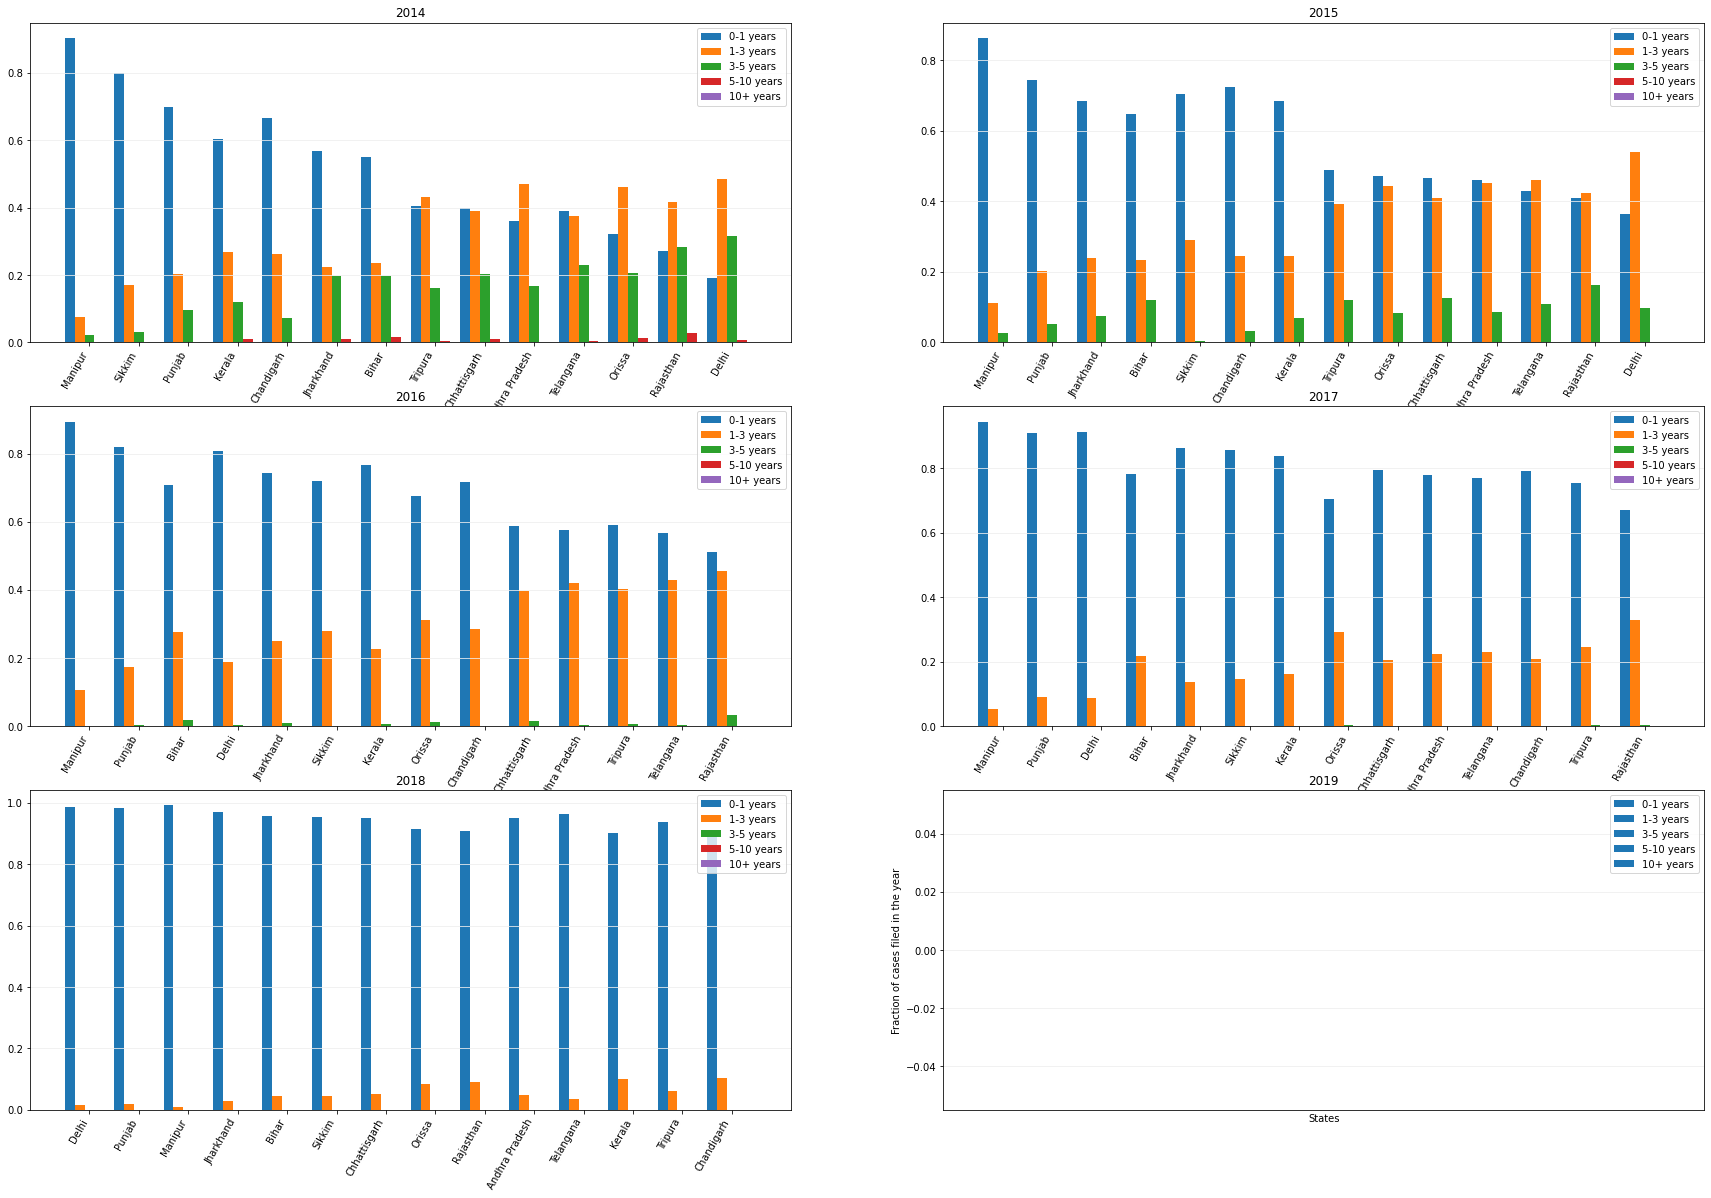

In [38]:
# sorted_mv[(sorted_mv['state_code'] == 3) | (sorted_mv['state_code'] == 4)]
best_states = {'MV' : [3, 5, 24, 30, 14, 12, 6, 22, 15],
               'NI' : [3, 4, 30, 32, 17, 22, 29],
               'IPC' : [7, 25, 4, 24, 27, 8, 22]
              }
worst_states = {'MV' : [7, 9, 2, 16, 26, 8, 11, 10, 29, 20],
               'NI' : [7, 9, 16, 23, 12, 13, 18],
               'IPC' : [9, 20, 2, 26, 11, 29, 18]
               }

def plotStateGraphs(data, best_state_code_list, worst_state_code_list, years, fileName, nrows = 3, ncols = 2, graphType = 'bar'):
    indexFilter = data['state_code'] == best_state_code_list[0]
    
    for sc in best_state_code_list:
        indexFilter = np.logical_or(indexFilter, data['state_code'] == sc)
    
    for sc in worst_state_code_list:
        indexFilter = np.logical_or(indexFilter, data['state_code'] == sc)
    
    data = data[indexFilter]
        
    
    f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))
    count = 0
    
    
    for row in range(nrows):
        for col in range(ncols):
            year_data = data[data['year'] == years[count]]
            if graphType == 'bar':
                axs[row,col].bar(x = year_data['state_name'], height = year_data['median_decision_days'])
                axs[row,col].set_title(years[count])
                axs[row,col].set_xticklabels( year_data['state_name'], rotation=60, ha='right')
                plt.xlabel('States')
                plt.ylabel('Median decision days')
            else:
                x = np.arange(len(year_data['state_name']))
                bar_width = 0.2
                
                axs[row,col].bar(x, height = year_data['A_count']/year_data['num_cases'], width = bar_width, label = '0-1 years')
                axs[row,col].bar(x + bar_width, height = year_data['B_count']/year_data['num_cases'], width = bar_width, label = '1-3 years')
                axs[row,col].bar(x + 2*bar_width, height = year_data['C_count']/year_data['num_cases'], width = bar_width, label = '3-5 years')
                axs[row,col].bar(x + 3*bar_width, height = year_data['D_count']/year_data['num_cases'], width = bar_width, label = '5-10 years')
                axs[row,col].bar(x + 4*bar_width, height = year_data['E_count']/year_data['num_cases'], width = bar_width, label = '10+ years')
                axs[row,col].set_title(years[count])
                axs[row,col].set_xticks( x + 2*bar_width)
                axs[row,col].set_xticklabels( year_data['state_name'], rotation=60, ha='right')
                axs[row,col].legend()
                axs[row,col].yaxis.grid(True, color='#EEEEEE')
                axs[row,col].xaxis.grid(False)
                plt.xlabel('States')
                plt.ylabel('Fraction of cases filed in the year')
            count += 1
#     plt.xticks(rotation=60, ha='right')
    plt.savefig(f'generated/{fileName}.png')
        

# plotStateGraphs(sorted_mv, [1,2], [3], [i for i in range(2014, 2020)], f'MV_state_comparison_by_decision_days_category_counts.png', graphType = 'groupedBar')
bestCount = 10
actFamilies = ['MV', 'NI', 'IPC']

for act_family, sorted_df in zip(actFamilies, sorted_dfs):
#     plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2014, 2020)], f'{act_family}_state_comparison_by_decision_days.png')
    plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2014, 2020)], f'{act_family}_state_comparison_by_decision_days_category_fractions.png', graphType = 'groupedBar')


In [20]:

for act_family, sorted_df in zip(actFamilies, sorted_dfs):
    print(act_family)
    best_states = set(sorted_df[sorted_df['year'] == 2014].head(n = bestCount)['state_code'].to_string(index=False).split())
    for year in years:
        best_states = best_states.intersection(sorted_df[sorted_df['year'] == int(year)].head(n = bestCount)['state_code'].to_string(index=False).split())

    print('Best ', best_states)

    worst_states = set(sorted_df[sorted_df['year'] == 2014].tail(n = bestCount)['state_code'].to_string(index=False).split())
    for year in years:
        worst_states = worst_states.intersection(sorted_df[sorted_df['year'] == int(year)].tail(n = bestCount)['state_code'].to_string(index=False).split())

    print('Worst ', worst_states)

MV
Best  {'3', '5', '24', '30', '14', '12', '6', '22', '15'}
Worst  {'7', '9', '2', '16', '26', '8', '11', '10', '29', '20'}
NI
Best  {'3', '4', '30', '32', '17', '22', '29'}
Worst  {'7', '9', '16', '23', '12', '13', '18'}
IPC
Best  {'7', '25', '4', '24', '27', '8', '22'}
Worst  {'9', '20', '2', '26', '11', '29', '18'}


In [4]:
dist_court_df = pd.read_csv('D:/Downloads/IISC/filtered_dist_court_nos.csv')
print(len(dist_court_df))
# temp_stats = utils.analyze_dist_court_wise_tenures_and_productivity(dist_court_df)
temp_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats.csv')
print(len(temp_stats))

1097
792


In [5]:
ll, lh, hl, hh = utils.group_courts_by_tenure_and_strength(temp_stats, 666.5, 1.067)
# plt.hist(temp_stats['median_tenure_days'], bins=20)
# print(len(temp_stats))
# print(len(temp_stats[temp_stats['median_tenure_days'] <= 200]))


In [6]:
print(ll.head())
print(lh.head())
print(hl.head())
print(hh.head())

    Unnamed: 0  state_code  dist_code  court_no  total_judge_days  \
1            1         1.0        1.0       7.0            1330.0   
5            5         1.0        4.0       9.0            1040.0   
6            6         1.0        4.0      14.0            3184.0   
8            8         1.0        5.0       5.0            2665.0   
13          13         1.0       11.0       3.0            2446.0   

    avg_judge_count  mean_tenure_days  median_tenure_days  num_judges  \
1          0.404871        443.333333               401.0         3.0   
5          0.316591        243.666667               177.0         9.0   
6          0.969254        249.076923               219.0        13.0   
8          0.811263        295.000000               230.5        12.0   
13         0.744597        635.400000               364.0         5.0   

    num_valid_entries  
1                 3.0  
5                 9.0  
6                13.0  
8                12.0  
13                5.0  
  

In [7]:
# temp_case_stats = utils.get_case_stats_for_courts(dist_court_df)
temp_case_stats = pd.read_csv('generated/district_court_case_decision_stats.csv')

 
0.05433 x + 180.6
Corr Coef :  [[1.         0.09757614]
 [0.09757614 1.        ]]


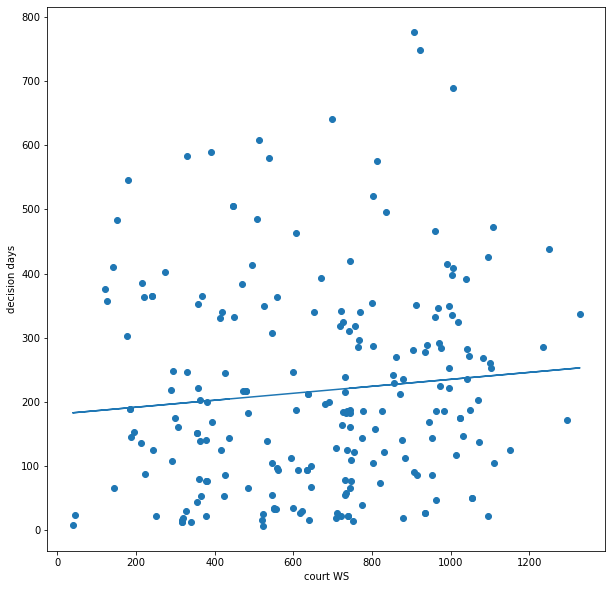

In [13]:
#append lh, hh #high working strength
high_working_strength = pd.concat([lh, hh])
# inner join with temp_case_stats on s,d,c
high_working_strength_case_stats = high_working_strength.merge(temp_case_stats, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
# high_working_strength_case_stats.to_csv('generated/dist_high_working_strength_case_stats.csv')
# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
# categories = np.unique(tenure_pendency_by_year_dist['year'])
# colors = np.linspace(0, 1, len(categories))
# colordict = dict(zip(categories, colors))  

# tenure_pendency_by_year_dist["Color"] = tenure_pendency_by_year_dist['year'].apply(lambda x: colordict[x])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x = np.array(high_working_strength_case_stats[high_working_strength_case_stats['avg_judge_count'] > 2]['median_tenure_days'])
y = np.array(high_working_strength_case_stats[high_working_strength_case_stats['avg_judge_count'] > 2]['median_decision_days'])
plt.scatter(x, y)
plt.xlabel('court WS')
plt.ylabel('decision days')
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
print(p)
print('Corr Coef : ', np.corrcoef(y, p(x)))
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

In [6]:
# temp_case_pendency_stats = utils.analyze_dist_court_wise_case_pendency_per_year(dist_court_df)

Processing cases for year : 2010
Processing cases for year : 2011
Processing cases for year : 2012
Processing cases for year : 2013
Processing cases for year : 2014
Processing cases for year : 2015
Processing cases for year : 2016
Processing cases for year : 2017
Processing cases for year : 2018


In [8]:
# yearwise_tenures = utils.analyze_dist_court_wise_tenures_by_year(dist_court_df)
yearwise_tenures = pd.read_csv('generated/dist_court_wise_tenures_by_year.csv')

 
-9.404e-06 x + 1.144
[[1.         0.00589191]
 [0.00589191 1.        ]]
{'2010': 0.0, '2011': 0.125, '2012': 0.25, '2013': 0.375, '2014': 0.5, '2015': 0.625, '2016': 0.75, '2017': 0.875, '2018': 1.0}


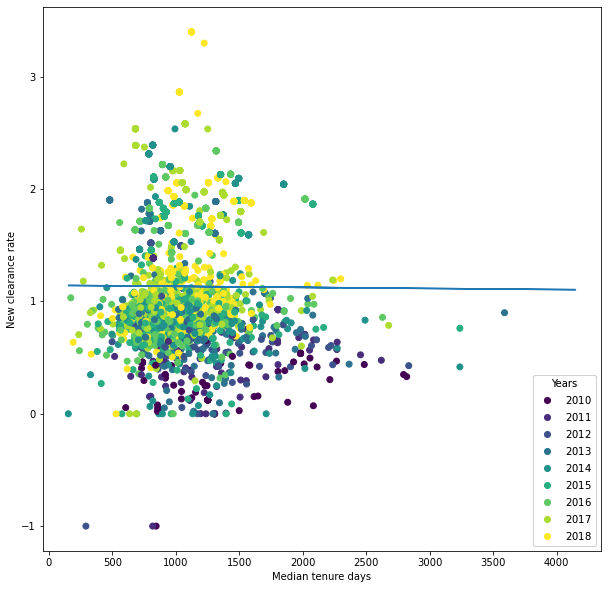

In [20]:
#append lh, hh #high working strength
temp_case_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_per_year.csv')
temp_case_pendency_stats['year'] = temp_case_pendency_stats['year'].astype(str)
high_working_strength = pd.concat([lh, hh])
# inner join with yearwise_tenures on year,s,d,c to filter only high working strength courts

high_working_strength_tenures_by_year = high_working_strength.merge(yearwise_tenures, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
temp_case_pendency_stats['year'] = temp_case_pendency_stats['year'].astype(str)
high_working_strength_tenures_by_year['year'] = high_working_strength_tenures_by_year['year'].astype(str)
high_working_strength_tenures_and_pendency_by_year = high_working_strength_tenures_by_year.merge(temp_case_pendency_stats, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])

# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
categories = np.unique(high_working_strength_tenures_and_pendency_by_year['year'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

high_working_strength_tenures_and_pendency_by_year["Color"] = high_working_strength_tenures_and_pendency_by_year['year'].apply(lambda x: colordict[x])

f, axs = plt.subplots()
f.set_figwidth(10)
f.set_figheight(10)
x = np.array(high_working_strength_tenures_and_pendency_by_year[high_working_strength_tenures_and_pendency_by_year['avg_daily_judge_count'] > 2]['weighted_mean_tenure'])
y = np.array(high_working_strength_tenures_and_pendency_by_year[high_working_strength_tenures_and_pendency_by_year['avg_daily_judge_count'] > 2]['new_clearance_rate'])
color = np.array(high_working_strength_tenures_and_pendency_by_year[high_working_strength_tenures_and_pendency_by_year['avg_daily_judge_count'] > 2]['year']).astype(int)
scatterplot = axs.scatter(x, y, c = color)
legend1 = axs.legend(*scatterplot.legend_elements(), loc="lower right", title="Years")
axs.add_artist(legend1)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.xlabel('Median tenure days')
plt.ylabel('New clearance rate')
plt.plot(x,p(x))
plt.savefig('generated/high_working_strength_tenures_and_pendency_by_year.png')
print(p)
print(np.corrcoef(y,p(x)))
print(colordict)
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

In [22]:
high_working_strength_tenures_and_pendency_by_year.to_csv('generated/high_working_strength_tenures_and_pendency_by_year.csv')

Index(['Unnamed: 0_x', 'year', 'state_code', 'dist_code', 'court_no',
       'total_judge_count', 'median_tenure', 'mean_tenure',
       'weighted_mean_tenure', 'avg_daily_judge_count', 'Unnamed: 0_y',
       'num_instituted', 'num_disposed', 'num_disposed_from_instituted',
       'clearance_rate', 'pending_count', 'new_clearance_rate',
       'median_decision_days', 'mean_decision_days', 'work_load', 'Color'],
      dtype='object')
 
-0.02014 x + 261.1
[[1.         0.18584133]
 [0.18584133 1.        ]]


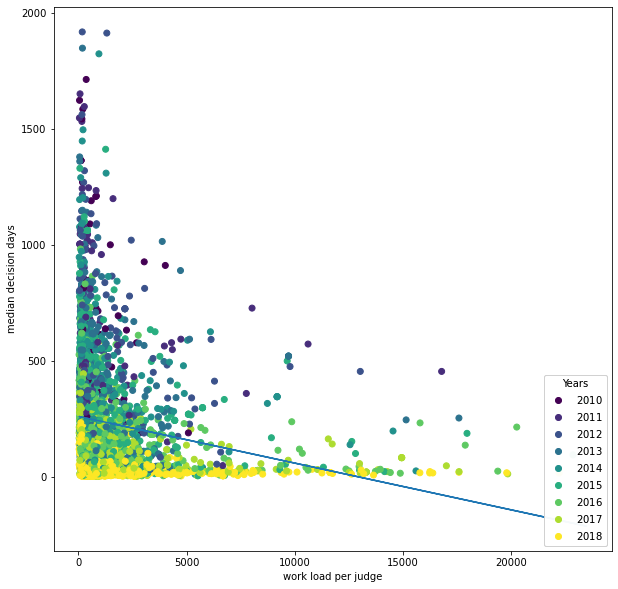

In [32]:
temp_case_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_per_year.csv')
# temp_case_pendency_stats['year'] = temp_case_pendency_stats['year'].astype(str)
# inner join with temp_case_stats on s,d,c
judge_case_stats = yearwise_tenures.merge(temp_case_pendency_stats, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
judge_case_stats.insert(len(judge_case_stats.columns), 'work_load', judge_case_stats['num_instituted']/judge_case_stats['avg_daily_judge_count'])
# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
categories = np.unique(judge_case_stats['year'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

judge_case_stats["Color"] = judge_case_stats['year'].apply(lambda x: colordict[x])

f, axs = plt.subplots()

f.set_figwidth(10)
f.set_figheight(10)
judge_case_stats = judge_case_stats[judge_case_stats['avg_daily_judge_count'] > 0.5]
judge_case_stats = judge_case_stats[judge_case_stats['total_judge_count'] > 1]
judge_case_stats = judge_case_stats[judge_case_stats['num_instituted'] > 100]
print(judge_case_stats.columns)
x = np.array(judge_case_stats['work_load'])
y = np.array(judge_case_stats['median_decision_days'])
color = np.array(judge_case_stats['year']).astype(int)
scatterplot = axs.scatter(x, y, c = color)
legend1 = axs.legend(*scatterplot.legend_elements(), loc="lower right", title="Years")
axs.add_artist(legend1)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.xlabel('work load per judge')
plt.ylabel('median decision days')
plt.plot(x,p(x))
plt.savefig('generated/district_court_decision_days_vs_work_load.png')
print(p)
print(np.corrcoef(y,p(x)))
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

 
6.623e-07 x + 1.015
[[1.         0.00309102]
 [0.00309102 1.        ]]


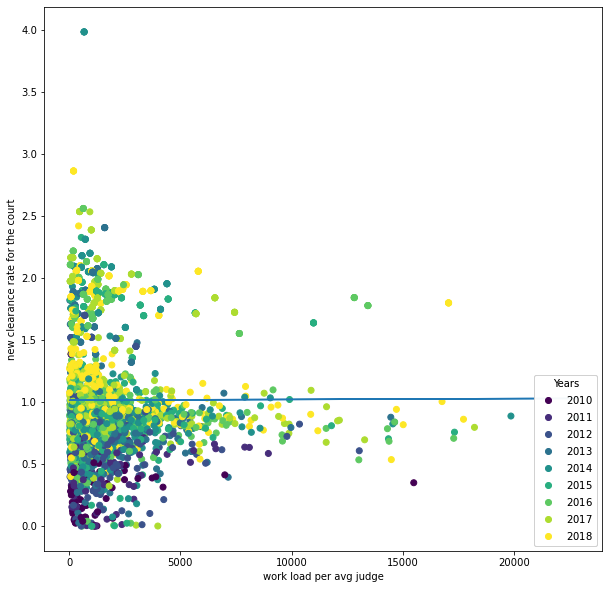

In [12]:
yearwisetenures = pd.read_csv('generated/dist_court_wise_tenures_by_year.csv')
temp_case_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_per_year.csv')
# inner join with temp_case_stats on s,d,c
judge_case_stats = yearwisetenures.merge(temp_case_pendency_stats, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
judge_case_stats.insert(len(judge_case_stats.columns), 'work_load', judge_case_stats['num_instituted']/judge_case_stats['total_judge_count'])
# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
f, axs = plt.subplots()

f.set_figwidth(10)
f.set_figheight(10)

judge_case_stats = judge_case_stats[judge_case_stats['total_judge_count'] >= 1]
judge_case_stats = judge_case_stats[judge_case_stats['avg_daily_judge_count'] > 0.5]
x = np.array(judge_case_stats[judge_case_stats['num_instituted'] > 1000]['work_load'])
y = np.array(judge_case_stats[judge_case_stats['num_instituted'] > 1000]['new_clearance_rate'])
color = np.array(judge_case_stats[judge_case_stats['num_instituted'] > 1000]['year']).astype(int)
plt.xlabel('work load per avg judge')
plt.ylabel('new clearance rate for the court')
scatterplot = axs.scatter(x, y, c = color)
legend1 = axs.legend(*scatterplot.legend_elements(), loc="lower right", title="Years")
axs.add_artist(legend1)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
print(p)
print(np.corrcoef(y, p(x)))
plt.savefig('generated/district_court_clearance_rate_vs_work_load.png')
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

In [3]:
# jt, jt_by_year = utils.analyze_dist_wise_judge_tenures_for(3)
# jt.to_csv('generated/karnataka_judge_tenures.csv')
# jt_by_year.to_csv('generated/karnataka_judge_tenures_by_year.csv')
# pendency_data = utils.analyze_dist_wise_case_pendency_per_year(3)
# pendency_data.to_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')
# year_and_dist_wise_tenures = utils.analyze_year_dist_wise_judge_tenures_for(3)
# year_and_dist_wise_tenures.to_csv('generated/karnataka_year_dist_wise_judge_tenures.csv')

# year_and_dist_wise_tenures = pd.read_csv('generated/karnataka_year_dist_wise_judge_tenures.csv')
# year_and_dist_wise_pendency_data = pd.read_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')
# tenure_pendency_by_year_dist = year_and_dist_wise_pendency_data.merge(year_and_dist_wise_tenures, how = 'inner', on = ['year', 'state_code', 'dist_code'])
# tenure_pendency_by_year_dist.to_csv('generated/tenure_pendency_by_year_dist.csv')
# date_deltas = jt['appointment_duration']
# plt.hist(date_deltas, bins = 40)
# plt.title('Karnataka')
# plt.xlabel('Appointment duration')
# plt.ylabel('Number of judges')
# tenure_pendency_by_year_dist = pd.read_csv('generated/tenure_pendency_by_year_dist.csv')
# year_and_dist_wise_pendency_data = pd.read_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')

year_and_dist_wise_judge_strength = pd.read_csv('generated/sc_3_year_dist_wise_judge_counts.csv')
year_and_dist_wise_pendency_data = pd.read_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')
strength_pendency_by_year_dist = year_and_dist_wise_pendency_data.merge(year_and_dist_wise_judge_strength, how = 'inner', on = ['year', 'state_code', 'dist_code'])
strength_pendency_by_year_dist.to_csv('generated/strength_pendency_by_year_dist.csv')


In [3]:
cases_10 = pd.read_csv('cases/_/cases_2010.csv')
# cases_10.head()
# ddl_case_id	year	state_code	dist_code	court_no	date_of_filing	date_of_decision
cases_10.drop(['cino', 'judge_position', 'female_defendant', 'female_petitioner', 'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name', 'disp_name', 'date_first_list', 'date_last_list', 'date_next_list'], axis = 1)
acts_sections = pd.read_csv('acts_sections.csv')
# acts_sections.head()
acts_sections.drop(['section', 'bailable_ipc', 'number_sections_ipc', 'criminal'], axis = 1)


C:\Users\91888\.julia\conda\3\envs\keras-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ddl_case_id,act
0,06-03-02-210100004042014,17353.0
1,23-34-01-229900001012019,4759.0
2,13-18-03-204000030972016,17353.0
3,23-28-01-220102000232016,4759.0
4,01-35-05-203007002652012,17353.0
...,...,...
76811352,13-25-04-201300000162017,4650.0
76811353,13-25-02-201300001002017,10564.0
76811354,13-25-02-201300001202017,10564.0
76811355,13-25-02-201300000892017,4650.0


In [ ]:
acts_sections = acts_sections[acts_sections['ddl_case_id'].notnull()]
acts_sections = acts_sections[acts_sections['act'].notnull()]
case_acts = cases_10.merge(acts_sections, how = 'inner', on = ['ddl_case_id'])

In [ ]:
import re
date_for_20 = re.compile('^..-..-20[0-9][0-9]')

court_transfers = pd.DataFrame(columns = ['state_code', 'dist_code', 'court_no', 'transfers_in', 'transfers_out', 'avg_judge_count'])
for state_code in range(1, 34):
    state_judges = judges_clean[judges_clean['state_code'] == state_code]
    for dist_code in range(1, 77):
        dist_judges = state_judges[state_judges['dist_code'] == dist_code]
        if len(dist_judges) == 0:
            continue
        for court_no in range(1, 75):
            court_judges = dist_judges[dist_judges['court_no'] == court_no]
            if len(court_judges) == 0:
                continue
            transfers_in = 0
            transfers_out = 0
            avg_judge_count = 0.0
            null_end_date = court_judges['end_date'].isnull()
            earliest_start_date = '31-12-2020'
            latest_end_date = '31-12-1999'
            max_end_date = '31-12-2020'
            for idx, row in court_judges.iterrows():
                transfers_in += 1
                if not null_end_date[idx] and date_for_20.match(row['end_date']):
                    transfers_out += 1
                    avg_judge_count += (datetime.datetime.strptime(row['end_date'],"%d-%m-%Y")  - datetime.datetime.strptime(row['start_date'],"%d-%m-%Y")).days
                else:
                    avg_judge_count += (datetime.datetime.strptime(max_end_date,"%d-%m-%Y")  - datetime.datetime.strptime(row['start_date'],"%d-%m-%Y")).days
                    latest_end_date = max_end_date
                
                if ((datetime.datetime.strptime(row['start_date'],"%d-%m-%Y")  - datetime.datetime.strptime(earliest_start_date,"%d-%m-%Y")).days < 0):
                    earliest_start_date = row['start_date']
                
                if (not null_end_date[idx] and (datetime.datetime.strptime(row['end_date'],"%d-%m-%Y") - datetime.datetime.strptime(latest_end_date,"%d-%m-%Y")).days > 0):
                    latest_end_date = row['end_date']
            avg_judge_count = avg_judge_count/(datetime.datetime.strptime(latest_end_date,"%d-%m-%Y")  - datetime.datetime.strptime(earliest_start_date,"%d-%m-%Y")).days
            #save transfer info for court
            court_transfers.loc[len(court_transfers.index)] = [state_code, dist_code, court_no, transfers_in, transfers_out, avg_judge_count]
            

In [ ]:
court_transfers.head()

temp = court_transfers[court_transfers['state_code'] == 29]
temp = temp[temp['dist_code'] == 2]
temp = temp[temp['court_no'] == 3]
temp.head()
# court_transfers.to_csv('processed_per_court_judge_data.csv')

In [ ]:
# cases_10_sc23 = judges_clean[judges_clean['state_code'] == 3]
# cases_10_sc23_dc50 = cases_10_sc23[cases_10_sc23['dist_code'] == 20]
# cases_10_sc23_dc50_cn1 = cases_10_sc23_dc50[cases_10_sc23_dc50['court_no'] == 1]
# cases_10_sc23_dc50_cn1.head()

In [ ]:
# case_counts_by_court_temp = cases_10.groupby(['state_code', 'dist_code', 'court_no']).count()
case_counts_by_court_temp[case_counts_by_court_temp['year'] == 4404]
# case_counts_by_court_temp.head()

In [ ]:
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')

def plotDateDeltas(caseData, title):
    date_deltas = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(caseData['date_of_decision'][caseData['date_of_decision'].notnull()], caseData['date_of_filing'][caseData['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]
    date_deltas_df = pd.DataFrame(date_deltas)
#     print(f'mean : {np.mean(date_deltas)}')
#     print(f'median : {np.median(date_deltas)}')
    print(date_deltas_df.describe())
    plt.hist(date_deltas, bins = 40)
    plt.title(title)
    plt.xlabel('Days to decision')
    plt.ylabel('Number of cases')

In [ ]:
# case_counts_by_court_temp = case_counts_by_court_temp.sort_values(by = 'year')
case_counts_by_court_temp.head()

In [ ]:
cases_10_sc23 = cases_10[cases_10['state_code'] == 3]
cases_10_sc23_dc50 = cases_10_sc23[cases_10_sc23['dist_code'] == 22]
cases_10_sc23_dc50_cn1 = cases_10_sc23_dc50[cases_10_sc23_dc50['court_no'] == 1]
plotDateDeltas(cases_10_sc23_dc50_cn1, '23,43,1')
temp = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(cases_10_sc23_dc50_cn1['date_of_decision'][cases_10_sc23_dc50_cn1['date_of_decision'].notnull()], cases_10_sc23_dc50_cn1['date_of_filing'][cases_10_sc23_dc50_cn1['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]


In [ ]:
# cases_10_sc23_dc50_cn1.tail()
len(cases_10_sc23_dc50_cn1)

In [ ]:
len(temp)

In [ ]:
case_counts_by_court_temp.tail()

In [ ]:
np.sum(judges_clean['female_judge'][:] == '1 female') + np.sum(judges_clean['female_judge'][:] == '0 nonfemale') + np.sum(judges_clean['female_judge'][:] == '-9998 unclear')

In [ ]:
sns.countplot(x = 'female_judge', data = judges_clean)
plt.savefig('judge_gender_distribution.png')

In [ ]:
date_deltas = [(datetime.datetime.strptime(end_date,"%d-%m-%Y")  - datetime.datetime.strptime(start_date,"%d-%m-%Y")).days for end_date, start_date in zip(judges_clean['end_date'][judges_clean['end_date'].notnull()], judges_clean['start_date'][judges_clean['end_date'].notnull()])]

In [ ]:
sns.distplot(date_deltas, bins = 25, kde = True)
plt.savefig('judge_gender_distribution.png')

In [ ]:
plt.hist(date_deltas, bins = 40)
plt.xlabel('position held for days')
plt.ylabel('number of judges')
plt.savefig('judge_position_duration.png')

In [2]:
cases_10 = pd.read_csv('cases/_/cases_2010.csv')

In [3]:
cases_10.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-200308002162010,2010,1,1,1,MHNB030013812010,chief judicial magistrate,0 male,1 female,0,-9998,790,5228.0,42,2010-12-13,2011-06-19,2011-06-08,2011-06-20,2011-06-24
1,01-01-01-200707000172010,2010,1,1,1,MHNB030004552010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
2,01-01-01-200707000182010,2010,1,1,1,MHNB030004562010,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
3,01-01-01-200707000192010,2010,1,1,1,MHNB030004582010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
4,01-01-01-200707000202010,2010,1,1,1,MHNB030004592010,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30


In [ ]:
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')
case_durations = pd.DataFrame(columns = ['state_code', 'dist_code', 'court_no', 'median', 'mean', 'case_count'])
for state_code in range(1, 34):
    state_cases = cases_10[cases_10['state_code'] == state_code]
    for dist_code in range(1, 77):
        dist_cases = state_cases[state_cases['dist_code'] == dist_code]
        if len(dist_cases) == 0:
            continue
        for court_no in range(1, 75):
            court_cases = dist_cases[dist_cases['court_no'] == court_no]
            if len(court_cases) == 0:
                continue
            case_count = len(court_cases)
            case_date_deltas = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(court_cases['date_of_decision'][court_cases['date_of_decision'].notnull()], court_cases['date_of_filing'][court_cases['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]
            if (len(case_date_deltas) > 0):
                median = np.median(case_date_deltas)
                mean = np.mean(case_date_deltas)
            
                #save transfer info for court
                case_durations.loc[len(case_durations.index)] = [state_code, dist_code, court_no, median, mean, case_count]
            

In [ ]:
# case_durations.to_csv('processed_case_durations.csv')
# cases_10 = 0
# court_transfers = pd.read_csv('processed_per_court_judge_data.csv')
# court_transfers_durations = case_durations.merge(court_transfers, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
case_durations[case_durations['median'] == 18]

In [ ]:
# np.min(court_transfers_durations['median'][court_transfers_durations['case_count'] > 2000])
# court_transfers_durations[court_transfers_durations['median'] == 18]
x = court_transfers_durations['median'][court_transfers_durations['case_count'] > 5000]
# y = (court_transfers_durations['case_count'][court_transfers_durations['case_count'] > 5000])/court_transfers_durations['avg_judge_count'][court_transfers_durations['case_count'] > 5000]
# print(np.corrcoef(x,y))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.xlabel('Median days to decision')
plt.ylabel('Number of cases per judge (average)')
plt.title('Correlation for courts with more than 5000 cases')
plt.savefig('duration_count_correlation.png')

In [ ]:
# court_transfers_durations[court_transfers_durations['median'] == 18]
f, axis = plt.subplots(2, 2)
f.set_figwidth(16)
f.set_figheight(16)

sc_list = [3,9,11, 14]
name_list = ['Karnataka','Rajasthan','Orissa', 'Haryana']
for idx, sc in enumerate(sc_list):
    i = idx%2
    j = int(idx/2)
    x = court_transfers_durations['median'][court_transfers_durations['state_code'] == sc][court_transfers_durations['case_count'] >1000]
#     print(len(x))
    y = (court_transfers_durations['case_count'][court_transfers_durations['state_code'] == sc][court_transfers_durations['case_count'] >1000])/court_transfers_durations['avg_judge_count'][court_transfers_durations['state_code'] == sc][court_transfers_durations['case_count'] >1000]
    axis[i][j].scatter(x, y)
    axis[i][j].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
             (np.unique(x)), color='red')
    axis[i][j].set_title(name_list[idx])
    
plt.xlabel('Median days to decision')
plt.ylabel('Number of cases per judge (average)')
# plt.title('Correlation for courts with more than 1000 cases')

# print(np.corrcoef(x,y))

# f = plt.figure()
plt.savefig('duration_count_correlation_temp.png')
print(np.corrcoef(x,y))

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.hist(court_transfers_durations['median'][court_transfers_durations['case_count'] > 1000], bins = 40)
plt.title('Distribution across courts with at least 1000 cases')
plt.xlabel('Median number of days to decision')
plt.ylabel('Number of courts')
plt.savefig('median_distribution.png')

In [3]:
acts_sections = pd.read_csv('acts_sections.csv')

C:\Users\91888\.julia\conda\3\envs\keras-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
cases_10[cases_10['ddl_case_id'] == '01-01-01-201908002322010']

In [4]:
acts_sections.head()

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
0,06-03-02-210100004042014,17353.0,NaN,NaN,1.0,1
1,23-34-01-229900001012019,4759.0,NaN,NaN,NaN,1
2,13-18-03-204000030972016,17353.0,NaN,NaN,1.0,1
3,23-28-01-220102000232016,4759.0,NaN,NaN,NaN,1
4,01-35-05-203007002652012,17353.0,NaN,NaN,1.0,1


In [ ]:
len(acts_sections)

In [ ]:
acts_sections = acts_sections.dropna()

In [ ]:
case_acts = cases_10.merge(acts_sections, how = 'inner', on = ['ddl_case_id'])

In [ ]:
# True in case_acts['act'].notnull()
case_acts.head()

In [ ]:
casedurations = [(datetime.datetime.strptime(end_date,"%Y-%m-%d")  - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(case_acts['date_of_decision'][case_acts['date_of_decision'].notnull()], case_acts['date_of_filing'][case_acts['date_of_decision'].notnull()])]

In [ ]:
sns.boxplot(x = casedurations)

In [ ]:
max(casedurations)

In [ ]:
casedurations.index(-729969)

In [ ]:
# for t in case_acts.loc[1:, ['date_of_decision', 'date_of_filing']]:
#     print((datetime.datetime.strptime(dd,"%Y-%m-%d")  - datetime.datetime.strptime(df,"%Y-%m-%d")).days)
#     print(t)
case_acts.loc[674:675, ['date_of_decision', 'date_of_filing']]
case_acts.loc[[65133,392818,443451,443452], ['date_of_decision', 'date_of_filing']]

In [ ]:
print(type('a'))
for idx, row in case_acts.iterrows():
    if (type(row['date_of_decision']) == type('abc')):
        diff = ((datetime.datetime.strptime(row['date_of_decision'],"%Y-%m-%d")  - datetime.datetime.strptime(row['date_of_filing'],"%Y-%m-%d")).days)
        if (diff > 100000):
            print(idx)

In [ ]:
casedurations_filtered = [i for i in casedurations if i > 0 and i < 10000]

In [ ]:
sns.boxplot(x = casedurations_filtered)
plt.xlabel('days to decision')
plt.savefig('days_to_decision.png')

In [ ]:
len(cases_10)

In [ ]:
455207/4281327 #% of cases that are criminal

In [ ]:
act_section_counts = case_acts.groupby(['act', 'section']).count()

In [ ]:
act_section_counts = act_section_counts.loc[:, ['criminal']].sort_values(by="criminal")
# act_section_counts.to_csv('act_section_counts.csv')

In [ ]:
act_section_counts[480:500]

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xticks(rotation = 90)
plt.plot([str(sec) for sec in sections[480:500]], act_section_counts[480:500], 'bo-')
plt.title('Top 20 section violations under act 17353 (Indian Penal Code)')
plt.savefig('section_violation_counts.png')

In [ ]:
# mask = cases_10['date_of_decision']
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')

is_not_null = cases_10['date_of_decision'].notnull()
valid_pending_mask = []
#only consider null or 20th century decision dates
pending_count = 0
null_count = 0
for i in range(0, len(is_not_null)):
    date_of_decision = cases_10['date_of_decision'][i]
    date_of_filing = cases_10['date_of_filing'][i]
    if (not is_not_null[i]):
        null_count += 1
        pending_count += 1
        valid_pending_mask.append(True)
#         or date_for_20.match(date_of_decision)):
#         filter_mask.append(True)
#         if (is_not_null[i] and date_for_20.match(date_of_decision))
    else:
        if (date_for_20.match(date_of_decision) and (datetime.datetime.strptime(date_of_decision,"%Y-%m-%d") - datetime.datetime.strptime('2010-12-31',"%Y-%m-%d")).days > 0 and (datetime.datetime.strptime(date_of_decision,"%Y-%m-%d") - datetime.datetime.strptime(date_of_filing,"%Y-%m-%d")).days > 0):
            pending_count += 1
            valid_pending_mask.append(True)
#             print(date_of_decision)
        else:
            valid_pending_mask.append(False)
print(pending_count)
print(null_count)


In [ ]:
len(cases_10)

In [ ]:
date_for_20 = re.compile('^20[0-9][0-9]-*')
date_for_20.match('2018-09-09'),date_for_20.match('2118-09-09')

In [ ]:
case_counts_by_court  = case_acts.groupby(['state_code', 'dist_code', 'court_no']).count()

In [ ]:
case_counts_by_court.head()


In [ ]:
case_acts_1182576 = case_acts[case_acts['section'] == 1182576.0]
case_acts_965693 = case_acts[case_acts['section'] == 965693.0]
case_acts_865403 = case_acts[case_acts['section'] == 865403.0]
case_acts_647330 = case_acts[case_acts['section'] == 647330.0]
case_acts_841964 = case_acts[case_acts['section'] == 841964.0]

In [ ]:
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')

def plotDateDeltas(caseData, title):
    date_deltas = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(caseData['date_of_decision'][caseData['date_of_decision'].notnull()], caseData['date_of_filing'][caseData['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]
    date_deltas_df = pd.DataFrame(date_deltas)
#     print(f'mean : {np.mean(date_deltas)}')
#     print(f'median : {np.median(date_deltas)}')
    print(date_deltas_df.describe())
    plt.hist(date_deltas, bins = 40)
    plt.title(title)
    plt.xlabel('Days to decision')
    plt.ylabel('Number of cases')


In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_1182576, 'Section506')
plt.savefig('Section506.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_965693, 'Section379')
plt.savefig('Section379.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_865403, 'Section338')
plt.savefig('Section338.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_647330, 'Section279')
plt.savefig('Section279.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_841964, 'Section324')
plt.savefig('Section324.png')

In [ ]:
case_counts_by_court = case_counts_by_court.sort_values(by="criminal")

In [ ]:
case_counts_by_court[3550:3555]

In [ ]:
case_acts_sc23 = case_acts[case_acts['state_code'] == 23]

In [ ]:
case_acts_sc23_dc50 = case_acts_sc23[case_acts_sc23['dist_code'] == 50]

In [ ]:
case_acts_sc23_dc50_cn1 = case_acts_sc23_dc50[case_acts_sc23_dc50['court_no'] == 1]

In [ ]:
case_acts_sc23_dc43 = case_acts_sc23[case_acts_sc23['dist_code'] == 43]

In [ ]:
case_acts_sc23_dc43_cn1 = case_acts_sc23_dc43[case_acts_sc23_dc43['court_no'] == 1]

In [ ]:
case_acts_sc29 = case_acts[case_acts['state_code'] == 29]
case_acts_sc29_dc2 = case_acts_sc29[case_acts_sc29['dist_code'] == 2]
case_acts_sc29_dc2_cn3 = case_acts_sc29_dc2[case_acts_sc29_dc2['court_no'] == 3]

In [ ]:
case_acts_sc23_dc50_cn1_section_counts = case_acts_sc23_dc50_cn1.groupby(['section']).count()

In [ ]:
case_acts_sc23_dc50_cn1_section_counts.sort_values(by = 'criminal')

In [ ]:
for idx, row in case_acts_sc23_dc50_cn1.iterrows():
    if (type(row['date_of_decision']) == type('abc')):
        diff = ((datetime.datetime.strptime(row['date_of_decision'],"%Y-%m-%d")  - datetime.datetime.strptime(row['date_of_filing'],"%Y-%m-%d")).days)
        if (diff > 3000):
            print(idx, row['date_of_decision'], row['date_of_filing'], row['ddl_case_id'])

In [ ]:
# case_acts_sc29 = case_acts[case_acts['state_code'] == 29]
# case_acts_sc29_dc2 = case_acts_sc29[case_acts_sc29['dist_code'] == 2]
# case_acts_sc29_dc2_cn3 = case_acts_sc29_dc2[case_acts_sc29_dc2['court_no'] == 3]
case_acts_sc29_dc2_cn3_section_counts = case_acts_sc29_dc2_cn3.groupby(['section']).count()

In [ ]:
case_acts_sc29_dc2_cn3_section_counts.sort_values(by = 'criminal')